<h1 style='color:purple' align='center'>Data Science Regression Project: Predicting Home Prices in Banglore</h1>

Dataset is downloaded from here: https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

<h2 style='color:blue'>Data Load: Load banglore home prices into a dataframe</h2>

In [7]:
csv_file_path = 'C:\\Users\\ASUS\\Desktop\\cc\\new\\house_prices.csv'
df1 = pd.read_csv(csv_file_path)
df1.head()

,Title,Sub_title,Price,Address,Baths,Land size,Beds,House size,Location,Description,Post_URL,Seller_name,Seller_type,published_date,Geo_Address,Lat,Lon
0,House with Land for Sale in Matara for sale,"Posted on 06 Nov 2:32 pm, Matara City, Matara","Rs 5,400,000","Gangodagama Roard,Hakmana,Matara.",1,50.0 perches,3,"1,600.0 sqft","Matara City, Matara","Land for sale with house Matara,Hakmana Gangod...",https://ikman.lk/en/ad/house-with-land-for-sal...,Ishara Dilshan,Member,2021-11-06 14:32:00,"Matara City, Matara, Sri Lanka",80.500000,6.166670
1,à¶ à¶½à·à¶­à· à¶à·à¶¸à¶» 3 à¶ à¶à·à· à...,"Posted on 24 Oct 7:27 am, Athurugiriya, Colombo","Rs 16,800,000",Athurugiriya Galwarusapare,3,8.0 perches,3,"1,480.0 sqft","Athurugiriya, Colombo",*House For Sale In Athurugiriya *Galwarusapare...,https://ikman.lk/en/ad/alut-kaamr-3-k-grh-bhaa...,DILRUWAN REAL ESTATE,Premium-Member,2021-10-24 07:27:00,"Athurugiriya, Colombo, Sri Lanka",79.989929,6.877246
2,Kelaniya - House on 20P Land for sale for sale,"Posted on 17 Nov 5:19 pm, Kelaniya, Gampaha","Rs 20,000,000",Kelaniya- Ranaviru Maldeniya Road,2,20.0 perches,3,"2,800.0 sqft","Kelaniya, Gampaha","Kelaniya- Biyagama road, Ranaviru Maladeniya R...",https://ikman.lk/en/ad/kelaniya-house-on-20p-l...,Provident Paradise (Pvt) Ltd,Member,2021-11-17 17:19:00,"Kelaniya, Gampaha, Sri Lanka",79.914926,6.951178
3,House For Sale in Pamankada Lane Wellawatte Co...,"Posted on 17 Nov 5:07 pm, Colombo 6, Colombo","Rs 187,000,000",Pamankada Lane Wellawatte Colombo.06,5,22.0 perches,5,"4,000.0 sqft","Colombo 6, Colombo",22 Perches House For Sale in Pamankada Lane We...,https://ikman.lk/en/ad/house-for-sale-in-paman...,Colombo Construction Property Developers,Premium-Member,2021-11-17 17:07:00,"Colombo 6, Colombo, Sri Lanka",80.016670,6.866670
4,House For Sale - Attidiya for sale,"Posted on 17 Nov 5:06 pm, Dehiwala, Colombo","Rs 1,300,000",MainRoad Attidiya,1,6.3 perches,2,900.0 sqft,"Dehiwala, Colombo",*à¶ à¶­à·à¶­à·à¶©à·à¶º à¶´à·âà¶»à¶¯à·à·...,https://ikman.lk/en/ad/house-for-sale-attidiya...,Lakdinu Houses,Member,2021-11-17 17:06:00,"Dehiwala, Colombo, Sri Lanka",79.880242,6.838232


In [8]:
df1.shape

(15327, 17)

In [9]:
df1.columns

Index(['Title', 'Sub_title', 'Price', 'Address', 'Baths', 'Land size', 'Beds',
       'House size', 'Location', 'Description', 'Post_URL', 'Seller_name',
       'Seller_type', 'published_date', 'Geo_Address', 'Lat', 'Lon'],
      dtype='object')

In [108]:
df1['Location'].unique()

array([' Matara City,  Matara', ' Athurugiriya,  Colombo',
       ' Kelaniya,  Gampaha', ' Colombo 6,  Colombo',
       ' Dehiwala,  Colombo', ' Talawatugoda,  Colombo',
       ' Kandy City,  Kandy', ' Piliyandala,  Colombo',
       ' Kadawatha,  Gampaha', ' Gampaha City,  Gampaha',
       ' Katugastota,  Kandy', ' Negombo,  Gampaha', ' Malabe,  Colombo',
       ' Jaffna City,  Jaffna', ' Rajagiriya,  Colombo',
       ' Mount Lavinia,  Colombo', ' Battaramulla,  Colombo',
       ' Moratuwa,  Colombo', ' Nugegoda,  Colombo', ' Kottawa,  Colombo',
       ' Homagama,  Colombo', ' Minuwangoda,  Gampaha',
       ' Elpitiya,  Galle', ' Gampola,  Kandy', ' Karapitiya,  Galle',
       ' Colombo 9,  Colombo', ' Ratmalana,  Colombo',
       ' Kalutara City,  Kalutara', ' Boralesgamuwa,  Colombo',
       ' Baddegama,  Galle', ' Kotte,  Colombo', ' Kandana,  Gampaha',
       ' Kurunegala City,  Kurunegala', ' Nittambuwa,  Gampaha',
       ' Ragama,  Gampaha', ' Ja-Ela,  Gampaha', ' Chilaw,  Puttal

In [14]:
df1['Location'].value_counts()

 Piliyandala,  Colombo      2806
 Malabe,  Colombo           1590
 Negombo,  Gampaha          1363
 Talawatugoda,  Colombo     1296
 Kottawa,  Colombo           750
                            ... 
 Ibbagamuwa,  Kurunegala       1
 Kitulgala,  Kegalle           1
 Giriulla,  Kurunegala         1
 Haputale,  Badulla            1
 Wellawaya,  Monaragala        1
Name: Location, Length: 172, dtype: int64

**Drop features that are not required to build our model**

In [27]:
df2 = df1.drop(['Title','Seller_type','Post_URL','Sub_title','Address','Description','Seller_name','published_date','Geo_Address','Lat','Lon'],axis='columns')
df2.shape
df2.head()


,Price,Baths,Land size,Beds,House size,Location
0,"Rs 5,400,000",1,50.0 perches,3,"1,600.0 sqft","Matara City, Matara"
1,"Rs 16,800,000",3,8.0 perches,3,"1,480.0 sqft","Athurugiriya, Colombo"
2,"Rs 20,000,000",2,20.0 perches,3,"2,800.0 sqft","Kelaniya, Gampaha"
3,"Rs 187,000,000",5,22.0 perches,5,"4,000.0 sqft","Colombo 6, Colombo"
4,"Rs 1,300,000",1,6.3 perches,2,900.0 sqft,"Dehiwala, Colombo"


df2<h2 style='color:blue'>Data Cleaning: Handle NA values</h2>

In [32]:
df2.isnull().sum()

Price         0
Baths         0
Land size     0
Beds          0
House size    0
Location      0
dtype: int64

In [38]:
df2.shape

(15327, 6)

<h2 style='color:blue'>Feature Engineering</h2>

**Add new feature(integer) for bhk (Bedrooms Hall Kitchen)**

**Explore total_sqft feature**

In [40]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [155]:
df2['land_size_perch'] =df2['Land size'].apply(lambda x: x.split(' ')[0])
df2['house_size_sqft'] =df2['House size'].apply(lambda x: x.split(' ')[0])
df2['price_RS'] =df2['Price'].apply(lambda x: x.split(' ')[1])
df3=df2.drop(['Land size','text_split','land_size_sqft',],axis='columns')
df4=df3.drop(['land_size','House size', 'Price'],axis='columns')
df4.head()

,Baths,Beds,Location,land_size_perch,house_size_sqft,price_RS
0,1,3,"Matara City, Matara",50.0,"1,600.0","5,400,000"
1,3,3,"Athurugiriya, Colombo",8.0,"1,480.0","16,800,000"
2,2,3,"Kelaniya, Gampaha",20.0,"2,800.0","20,000,000"
3,5,5,"Colombo 6, Colombo",22.0,"4,000.0","187,000,000"
4,1,2,"Dehiwala, Colombo",6.3,900.0,"1,300,000"


In [171]:
df4[~df4['price_RS'].apply(is_float)].head()

,Baths,Beds,Location,land_size_perch,house_size_sqft,price_RS
0,1,3,"Matara City, Matara",50.0,"1,600.0","5,400,000"
1,3,3,"Athurugiriya, Colombo",8.0,"1,480.0","16,800,000"
2,2,3,"Kelaniya, Gampaha",20.0,"2,800.0","20,000,000"
3,5,5,"Colombo 6, Colombo",22.0,"4,000.0","187,000,000"
4,1,2,"Dehiwala, Colombo",6.3,900.0,"1,300,000"


In [158]:
df4.loc[100]

Baths                                4
Beds                                 5
Location            Homagama,  Colombo
land_size_perch                    6.0
house_size_sqft                3,800.0
price_RS                    29,800,000
Name: 100, dtype: object

<h2 style="color:blue">Feature Engineering</h2>

**Add new feature called price per square feet**

In [185]:
df4['land_size_perch'] = df4['land_size_perch'].astype(str).str.replace(',', '').astype(float)
df4['land_size_perch'] = pd.to_numeric(df4['land_size_perch'])
df4['land_size_perch'].head(15)


0       50.00
1        8.00
2       20.00
3       22.00
4        6.30
5       11.00
6       10.00
7        9.00
8       10.00
9     3000.00
10      10.00
11       9.85
12      10.50
13      11.40
14      80.00
Name: land_size_perch, dtype: float64

In [188]:
df4['price_RS'] = df4['price_RS'].astype(str).str.replace(',', '').astype(float)
df4['price_RS'] = pd.to_numeric(df4['price_RS'])
df4['price_RS'].head(15)

0       5400000.0
1      16800000.0
2      20000000.0
3     187000000.0
4       1300000.0
5      55000000.0
6      45000000.0
7      16700000.0
8      50000000.0
9      16000000.0
10     19500000.0
11     11500000.0
12     26500000.0
13     19000000.0
14     11000000.0
Name: price_RS, dtype: float64

In [198]:
df4['price_in_laks'] = df4['price_RS']/100000
df4['price_per_perch_in_laks'] = df4['price_in_laks']/df4['land_size_perch']
df5=df4.drop(['price_per_perch','price_RS'],axis='columns')
df5.head()

,Baths,Beds,Location,land_size_perch,house_size_sqft,price_in_laks,price_per_perch_in_laks
0,1,3,"Matara City, Matara",50.0,"1,600.0",54.0,1.080000
1,3,3,"Athurugiriya, Colombo",8.0,"1,480.0",168.0,21.000000
2,2,3,"Kelaniya, Gampaha",20.0,"2,800.0",200.0,10.000000
3,5,5,"Colombo 6, Colombo",22.0,"4,000.0",1870.0,85.000000
4,1,2,"Dehiwala, Colombo",6.3,900.0,13.0,2.063492


In [205]:
df5['house_size_sqft'] = df5['house_size_sqft'].astype(str).str.replace(',', '').astype(float)
df5['house_size_perch'] = df5['house_size_sqft']/272.25
df6=df5.drop(['house_size_sqft'], axis='columns')
df6.head()

,Baths,Beds,Location,land_size_perch,price_in_laks,price_per_perch_in_laks,house_size_perch
0,1,3,"Matara City, Matara",50.0,54.0,1.080000,5.876951
1,3,3,"Athurugiriya, Colombo",8.0,168.0,21.000000,5.436180
2,2,3,"Kelaniya, Gampaha",20.0,200.0,10.000000,10.284665
3,5,5,"Colombo 6, Colombo",22.0,1870.0,85.000000,14.692378
4,1,2,"Dehiwala, Colombo",6.3,13.0,2.063492,3.305785


In [206]:
df6_stats = df6['price_per_perch_in_laks'].describe()
df6_stats

count    1.532700e+04
mean              inf
std               NaN
min      4.615385e-03
25%      1.553868e+01
50%      2.625000e+01
75%      4.000000e+01
max               inf
Name: price_per_perch_in_laks, dtype: float64

In [207]:
df6.to_csv("shp.csv",index=False)

**Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations**

In [208]:
df6.Location = df6.Location.apply(lambda x: x.strip())
location_stats = df6['Location'].value_counts(ascending=False)
location_stats

Piliyandala,  Colombo      2806
Malabe,  Colombo           1590
Negombo,  Gampaha          1363
Talawatugoda,  Colombo     1296
Kottawa,  Colombo           750
                           ... 
Ibbagamuwa,  Kurunegala       1
Kitulgala,  Kegalle           1
Giriulla,  Kurunegala         1
Haputale,  Badulla            1
Wellawaya,  Monaragala        1
Name: Location, Length: 172, dtype: int64

In [209]:
location_stats.values.sum()

15327

In [210]:
len(location_stats[location_stats>10])

87

In [211]:
len(location_stats)

172

In [212]:
len(location_stats[location_stats<=10])

85

<h2 style="color:blue">Dimensionality Reduction</h2>

**Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns**

In [213]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Pilimatalawa,  Kandy          10
Hanwella,  Colombo             9
Tissamaharama,  Hambantota     9
Ahangama,  Galle               8
Ukuwela,  Matale               8
                              ..
Ibbagamuwa,  Kurunegala        1
Kitulgala,  Kegalle            1
Giriulla,  Kurunegala          1
Haputale,  Badulla             1
Wellawaya,  Monaragala         1
Name: Location, Length: 85, dtype: int64

In [215]:
len(df6.Location.unique())

172

In [216]:
df6.Location = df6.Location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df6.Location.unique())


88

In [237]:
df6.head(50)

,Baths,Beds,Location,land_size_perch,price_in_laks,price_per_perch_in_laks,house_size_perch
0,1,3.0,"Matara City, Matara",50.00,54.0,1.080000,5.876951
1,3,3.0,"Athurugiriya, Colombo",8.00,168.0,21.000000,5.436180
2,2,3.0,"Kelaniya, Gampaha",20.00,200.0,10.000000,10.284665
3,5,5.0,"Colombo 6, Colombo",22.00,1870.0,85.000000,14.692378
4,1,2.0,"Dehiwala, Colombo",6.30,13.0,2.063492,3.305785
5,4,4.0,"Talawatugoda, Colombo",11.00,550.0,50.000000,12.121212
6,4,4.0,"Kandy City, Kandy",10.00,450.0,45.000000,15.059688
7,3,3.0,"Piliyandala, Colombo",9.00,167.0,18.555556,5.142332
8,4,4.0,"Talawatugoda, Colombo",10.00,500.0,50.000000,14.692378
9,1,3.0,"Kadawatha, Gampaha",3000.00,160.0,0.053333,7.346189


<h2 style="color:blue">Outlier Removal Using Business Logic</h2>

**As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft**

In [225]:
df6 = df6[df6['Beds'] != '10+']
df6['Beds'] = df6['Beds'].astype(str).str.replace(',', '').astype(float)
df6[df6.house_size_perch/df6.Beds<(300/272.25)].head()

,Baths,Beds,Location,land_size_perch,price_in_laks,price_per_perch_in_laks,house_size_perch
29,1,3.0,"Elpitiya, Galle",150.0,45.0,0.300000,2.754821
95,1,3.0,"Horana, Kalutara",20.0,75.0,3.750000,3.122130
213,7,6.0,"Talawatugoda, Colombo",24.0,1700.0,70.833333,5.142332
269,2,3.0,"Colombo 5, Colombo",4.0,150.0,37.500000,3.011938
464,1,3.0,"Wadduwa, Kalutara",10.0,65.0,6.500000,2.938476


**Check above data points. We have 6 bhk apartment with 1020 sqft. Another one is 8 bhk and total sqft is 600. These are clear data errors that can be removed safely**

In [226]:
df6.shape

(15270, 7)

In [229]:
df7 = df6[~(df6.house_size_perch/df6.Beds<(300/272.25))]
df7.shape

(14955, 7)

<h2 style='color:blue'>Outlier Removal Using Standard Deviation and Mean</h2>

In [230]:
df7.price_per_perch_in_laks.describe()


count    1.495500e+04
mean              inf
std               NaN
min      4.615385e-03
25%      1.565217e+01
50%      2.647059e+01
75%      4.000000e+01
max               inf
Name: price_per_perch_in_laks, dtype: float64

**Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation**

In [231]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df7.groupby('Location'):
        m = np.mean(subdf.price_per_perch_in_laks)
        st = np.std(subdf.price_per_perch_in_laks)
        reduced_df = subdf[(subdf.price_per_perch_in_laks>(m-st)) & (subdf.price_per_perch_in_laks<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df8 = remove_pps_outliers(df7)    
df8.shape

(12880, 7)

In [257]:
df8['Location'] = df8['Location'].str.split(',').str[0]
df8.head(55)
                                       

,Baths,Beds,Location,land_size_perch,price_in_laks,price_per_perch_in_laks,house_size_perch
0,1,4.0,Ambalangoda,10.00,68.0,6.800000,5.142332
1,1,2.0,Ambalangoda,10.00,35.0,3.500000,3.673095
2,2,5.0,Ambalangoda,22.00,200.0,9.090909,11.019284
3,1,3.0,Ambalangoda,10.00,57.0,5.700000,5.509642
4,4,5.0,Ambalangoda,14.00,125.0,8.928571,9.182736
5,2,3.0,Ambalangoda,7.00,65.0,9.285714,3.673095
6,1,3.0,Ambalangoda,9.50,52.0,5.473684,3.673095
7,1,4.0,Ambalangoda,10.00,47.0,4.700000,5.509642
8,1,3.0,Ambalangoda,10.50,60.0,5.714286,5.509642
9,1,4.0,Ambalangoda,15.00,62.0,4.133333,5.509642


**Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like**

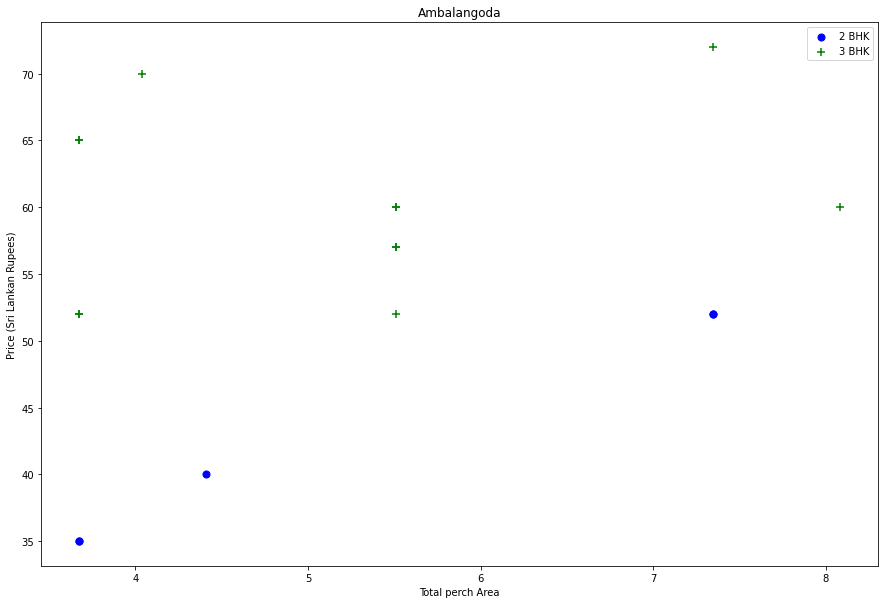

In [249]:
def plot_scatter_chart(df,Location):
    beds2 = df8[(df8.Location==Location) & (df8.Beds==2)]
    beds3 = df8[(df8.Location==Location) & (df8.Beds==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(beds2.house_size_perch,beds2.price_in_laks,color='blue',label='2 BHK', s=50)
    plt.scatter(beds3.house_size_perch,beds3.price_in_laks,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total perch Area")
    plt.ylabel("Price (Sri Lankan Rupees)")
    plt.title(Location)
    plt.legend()
    
    
    
plot_scatter_chart(df8,"Ambalangoda")

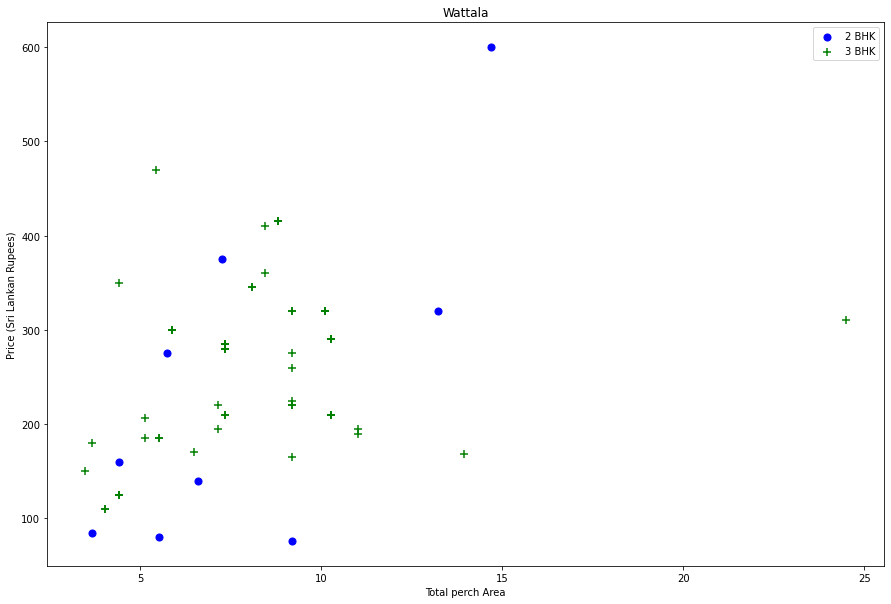

In [251]:
plot_scatter_chart(df7,"Wattala")

**We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.**
```
{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}
```
**Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment**

In [68]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
df8.shape

(7317, 7)

**Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties**

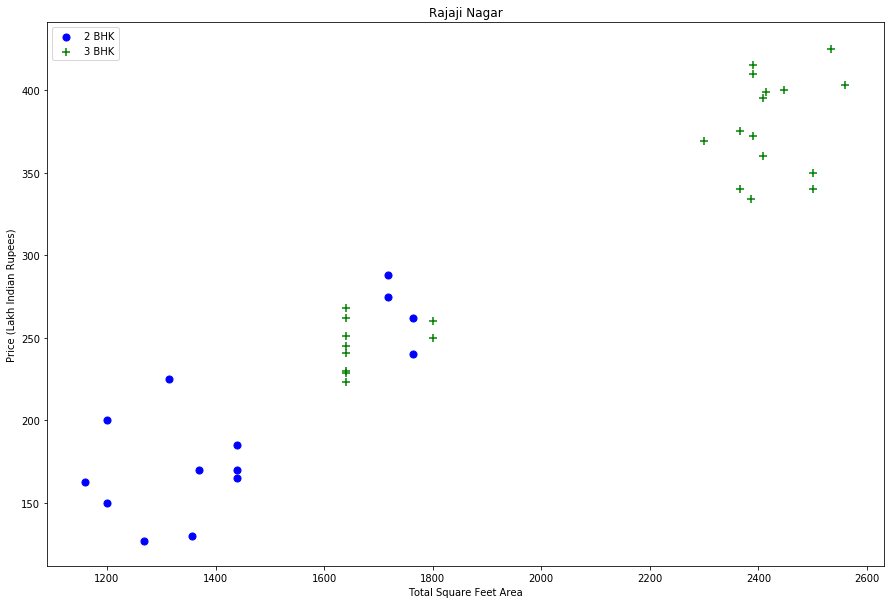

In [39]:
plot_scatter_chart(df8,"Rajaji Nagar")

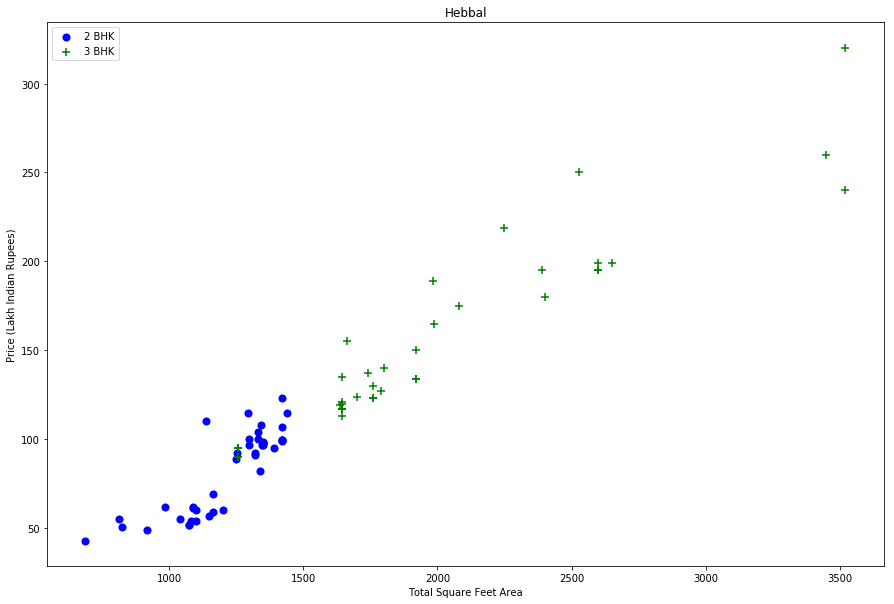

In [40]:
plot_scatter_chart(df8,"Hebbal")

**Based on above charts we can see that data points highlighted in red below are outliers and they are being removed due to remove_bhk_outliers function**

<h3 style='color:green'>Before and after outlier removal: Rajaji Nagar</h3>

<img src="rajaji_nagar_outliers.png"></img>

<h3 style='color:green'>Before and after outlier removal: Hebbal</h3>

<img src="hebbal_outliers.png"></img>

Text(0, 0.5, 'Count')

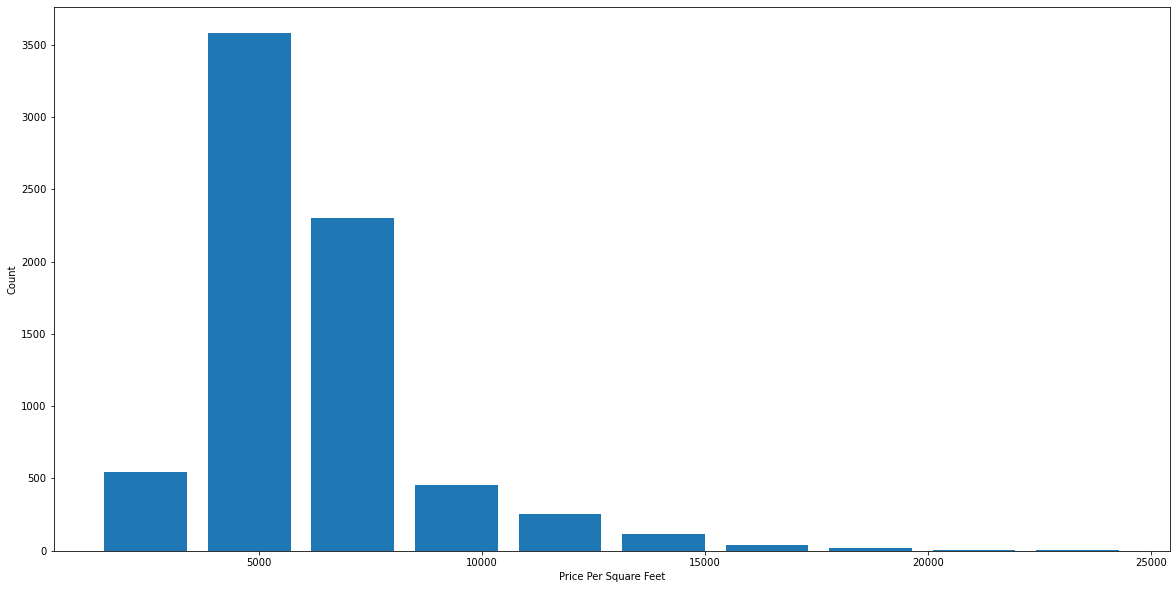

In [71]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

<h2 style='color:blue'>Outlier Removal Using Bathrooms Feature</h2>

In [72]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

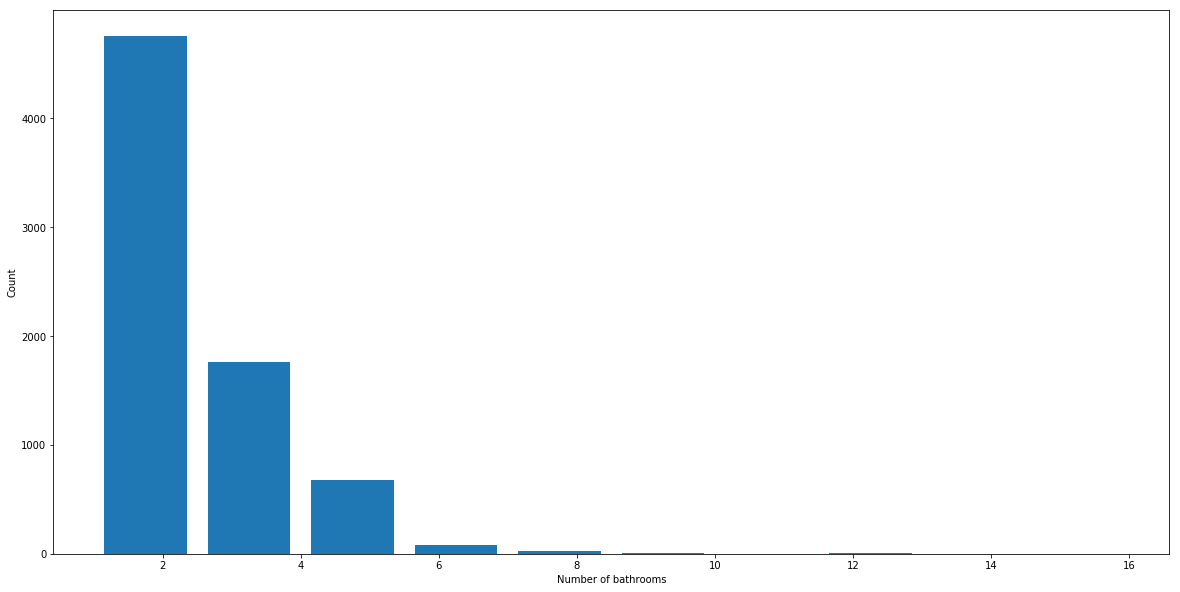

In [43]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [44]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8483,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8572,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9306,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9637,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


**It is unusual to have 2 more bathrooms than number of bedrooms in a home**

In [45]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8408,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


**Again the business manager has a conversation with you (i.e. a data scientist) that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed**

In [75]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7239, 7)

In [79]:
df9.head(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [81]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


<h2 style='color:blue'>Use One Hot Encoding For Location</h2>

In [83]:
dummies = pd.get_dummies(df10.location)
dummies.head(5)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head(7)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1st Block Jayanagar,2750.0,4.0,413.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1st Block Jayanagar,2450.0,4.0,368.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
df12 = df11.drop('location',axis='columns')
df12.head(2)  

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h2 style='color:blue'>Build a Model Now...</h2>

In [90]:
df12.shape

(7239, 244)

In [92]:
X = df12.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
X.shape

(7239, 243)

In [95]:
y = df12.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [101]:
len(y)

7239

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=13)

In [120]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8588660477968371

<h2 style='color:blue'>Use K Fold cross validation to measure accuracy of our LinearRegression model</h2>

In [125]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=5)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.84679966, 0.85513144, 0.85732321, 0.81251786, 0.82202831])

**We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose**

<h2 style='color:blue'>Find best model using GridSearchCV</h2>

In [126]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.847796,{'normalize': False}
1,lasso,0.726763,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.717884,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


**Based on above results we can say that LinearRegression gives the best score. Hence we will use that.**

<h2 style='color:blue'>Test the model for few properties</h2>

In [144]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0] 

In [146]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

90.5683286837602

In [147]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

93.52384203800524

In [148]:
predict_price('Indira Nagar',1000, 2, 2)

181.2218926964555

In [149]:
predict_price('Indira Nagar',1000, 3, 3)

184.17740605070054

<h2 style='color:blue'>Export the tested model to a pickle file</h2>

In [150]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

<h2 style='color:blue'>Export location and column information to a file that will be useful later on in our prediction application</h2>

In [151]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))